In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

plt.rcParams['font.family'] = 'Malgun Gothic'

import math

In [2]:
data = pd.read_csv('./sample_dataset.csv')

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500.0,2500.0,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000.0,30000.0,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000.0,4000.0,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000.0,30000.0,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop(columns=['id', 'member_id'], inplace=True)

In [6]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,2500.0,2500.0,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,30000.0,30000.0,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000.0,5000.0,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,4000.0,4000.0,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000.0,30000.0,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,1.999990e+05,0.0,0.0,199607.000000,199999.000000,...,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.0
mean,16039.883574,16039.883574,16036.981242,12.914751,466.006431,8.190613e+04,NaN,NaN,19.911201,0.227006,...,3.0,241.364000,3.0,4.400000,724.092000,19267.584000,337.378000,10140.833333,64.168333,18.0
std,10125.835675,10125.835675,10126.834884,5.181550,285.527001,9.964609e+04,NaN,NaN,19.835104,0.739661,...,0.0,129.603867,0.0,9.838699,388.811601,13069.848678,427.062095,7478.723833,2.042062,0.0
min,1000.000000,1000.000000,725.000000,6.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,0.000000,...,3.0,119.590000,3.0,0.000000,358.770000,8096.800000,1.010000,3422.000000,60.000000,18.0
25%,8200.000000,8200.000000,8200.000000,8.460000,256.130000,4.700000e+04,NaN,NaN,11.730000,0.000000,...,3.0,126.270000,3.0,0.000000,378.810000,9649.700000,1.210000,5245.750000,65.000000,18.0
50%,14000.000000,14000.000000,14000.000000,11.800000,387.680000,6.800000e+04,NaN,NaN,17.960000,0.000000,...,3.0,203.670000,3.0,0.000000,611.010000,15351.850000,292.830000,7781.000000,65.000000,18.0
75%,22000.000000,22000.000000,22000.000000,16.140000,625.260000,9.800000e+04,NaN,NaN,25.265000,0.000000,...,3.0,378.390000,3.0,0.000000,1135.170000,23090.220000,346.430000,12411.000000,65.000000,18.0
max,40000.000000,40000.000000,40000.000000,30.990000,1618.240000,9.757200e+06,NaN,NaN,999.000000,58.000000,...,3.0,378.900000,3.0,22.000000,1136.700000,40149.350000,1045.410000,23506.000000,65.010000,18.0


In [5]:
data.drop(columns=['url', 'desc'], inplace=True)

In [8]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,1.999990e+05,199607.000000,199999.000000,199999.000000,87544.000000,...,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.0
mean,16039.883574,16039.883574,16036.981242,12.914751,466.006431,8.190613e+04,19.911201,0.227006,0.437807,36.923650,...,3.0,241.364000,3.0,4.400000,724.092000,19267.584000,337.378000,10140.833333,64.168333,18.0
std,10125.835675,10125.835675,10126.834884,5.181550,285.527001,9.964609e+04,19.835104,0.739661,0.723986,21.839355,...,0.0,129.603867,0.0,9.838699,388.811601,13069.848678,427.062095,7478.723833,2.042062,0.0
min,1000.000000,1000.000000,725.000000,6.000000,30.480000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,3.0,119.590000,3.0,0.000000,358.770000,8096.800000,1.010000,3422.000000,60.000000,18.0
25%,8200.000000,8200.000000,8200.000000,8.460000,256.130000,4.700000e+04,11.730000,0.000000,0.000000,19.000000,...,3.0,126.270000,3.0,0.000000,378.810000,9649.700000,1.210000,5245.750000,65.000000,18.0
50%,14000.000000,14000.000000,14000.000000,11.800000,387.680000,6.800000e+04,17.960000,0.000000,0.000000,34.000000,...,3.0,203.670000,3.0,0.000000,611.010000,15351.850000,292.830000,7781.000000,65.000000,18.0
75%,22000.000000,22000.000000,22000.000000,16.140000,625.260000,9.800000e+04,25.265000,0.000000,1.000000,53.000000,...,3.0,378.390000,3.0,0.000000,1135.170000,23090.220000,346.430000,12411.000000,65.000000,18.0
max,40000.000000,40000.000000,40000.000000,30.990000,1618.240000,9.757200e+06,999.000000,58.000000,5.000000,179.000000,...,3.0,378.900000,3.0,22.000000,1136.700000,40149.350000,1045.410000,23506.000000,65.010000,18.0


In [7]:
data = data.iloc[:199999]

In [9]:
data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                          ...  
settlement_status        199993
settlement_date          199993
settlement_amount        199993
settlement_percentage    199993
settlement_term          199993
Length: 141, dtype: int64

In [10]:
data.shape

(199999, 141)

In [11]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,1.999990e+05,199607.000000,199999.000000,199999.000000,87544.000000,...,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.0
mean,16039.883574,16039.883574,16036.981242,12.914751,466.006431,8.190613e+04,19.911201,0.227006,0.437807,36.923650,...,3.0,241.364000,3.0,4.400000,724.092000,19267.584000,337.378000,10140.833333,64.168333,18.0
std,10125.835675,10125.835675,10126.834884,5.181550,285.527001,9.964609e+04,19.835104,0.739661,0.723986,21.839355,...,0.0,129.603867,0.0,9.838699,388.811601,13069.848678,427.062095,7478.723833,2.042062,0.0
min,1000.000000,1000.000000,725.000000,6.000000,30.480000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,3.0,119.590000,3.0,0.000000,358.770000,8096.800000,1.010000,3422.000000,60.000000,18.0
25%,8200.000000,8200.000000,8200.000000,8.460000,256.130000,4.700000e+04,11.730000,0.000000,0.000000,19.000000,...,3.0,126.270000,3.0,0.000000,378.810000,9649.700000,1.210000,5245.750000,65.000000,18.0
50%,14000.000000,14000.000000,14000.000000,11.800000,387.680000,6.800000e+04,17.960000,0.000000,0.000000,34.000000,...,3.0,203.670000,3.0,0.000000,611.010000,15351.850000,292.830000,7781.000000,65.000000,18.0
75%,22000.000000,22000.000000,22000.000000,16.140000,625.260000,9.800000e+04,25.265000,0.000000,1.000000,53.000000,...,3.0,378.390000,3.0,0.000000,1135.170000,23090.220000,346.430000,12411.000000,65.000000,18.0
max,40000.000000,40000.000000,40000.000000,30.990000,1618.240000,9.757200e+06,999.000000,58.000000,5.000000,179.000000,...,3.0,378.900000,3.0,22.000000,1136.700000,40149.350000,1045.410000,23506.000000,65.010000,18.0


In [97]:
data_dti = data['dti']

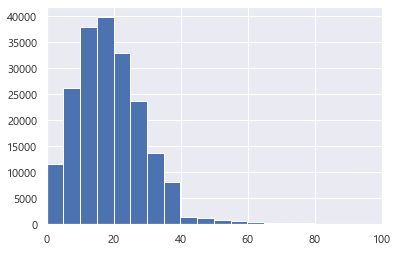

In [23]:
plt.hist(data_dti, bins=200)
plt.xlim([0, 100])
# plt.xlim([900, 1000])
# plt.ylim([0, 100])
plt.show()

<AxesSubplot:>

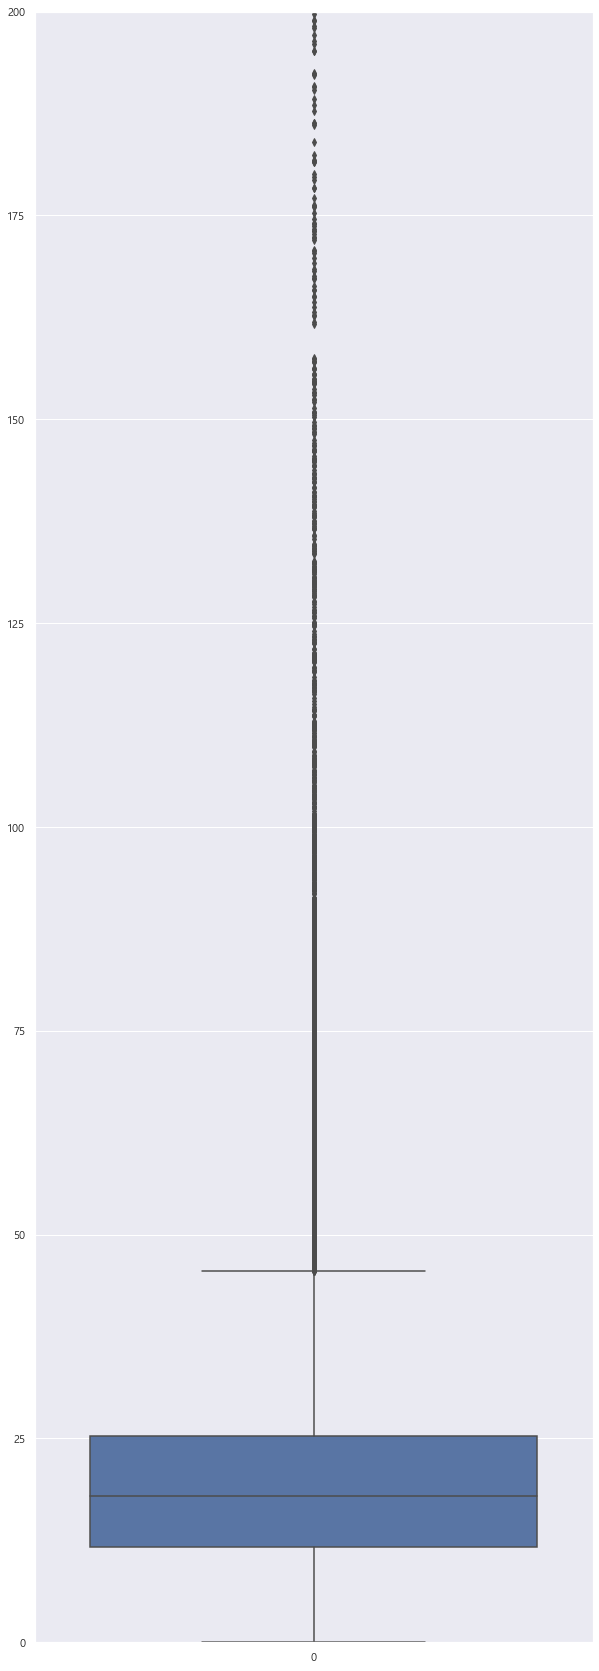

In [39]:
figure = plt.figure(figsize=(10, 30))
# plt.rcParams.update({'font.size': 22})
plt.ylim(0, 200)
sns.boxplot(data=data_dti)

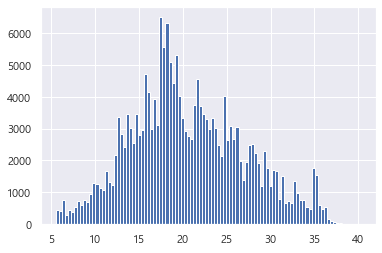

In [15]:
plt.hist(np.sqrt(data['installment']), bins=100)
# plt.xlim([0, 100])
# plt.xlim([900, 1000])
# plt.ylim([0, 100])
plt.show()

In [18]:
np.sqrt(data['installment']).skew()

0.2862031627045541

In [22]:
data['installment'].skew()

0.9498354231537218

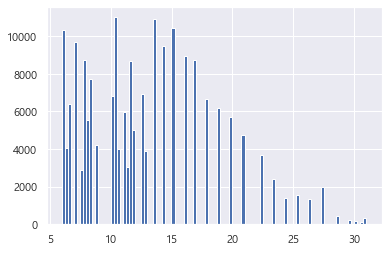

In [25]:
plt.hist(data['int_rate'], bins=100)
# plt.xlim([0, 100])
# plt.xlim([900, 1000])
# plt.ylim([0, 100])
plt.show()

In [26]:
data['int_rate'].skew()

0.8058507798218391

# 이상치 걸러보기

In [27]:
import scipy.stats as ss

In [33]:
data_dti

0         18.24
1         26.52
2         10.51
3         16.74
4         26.35
          ...  
199994    27.13
199995     6.63
199996    13.97
199997     6.64
199998    13.59
Name: dti, Length: 199999, dtype: float64

### Z-score

In [42]:
data_dti.mean()

19.91120080959099

In [43]:
data_dti.std()

19.835103502588783

In [44]:
dti_z = (data_dti-data_dti.mean())/data_dti.std()
dti_z

0        -0.084255
1         0.333187
2        -0.473968
3        -0.159878
4         0.324616
            ...   
199994    0.363941
199995   -0.669581
199996   -0.299530
199997   -0.669076
199998   -0.318688
Name: dti, Length: 199999, dtype: float64

In [47]:
dti_z[(dti_z>3.5)|(dti_z<-3.5)].count()

821

### modified Z-score

In [98]:
dti_modified = abs(data_dti-data_dti.quantile(q=0.5))

In [99]:
dti_mad = dti_modified.quantile(q=0.5)

In [100]:
dti_mod = (data_dti - data_dti.quantile(q=0.5)) * 0.6745 / dti_mad

In [104]:
(dti_mod>=-3.5)&(dti_mod<=3.5)

0         True
1         True
2         True
3         True
4         True
          ... 
199994    True
199995    True
199996    True
199997    True
199998    True
Name: dti, Length: 199999, dtype: bool

In [103]:
data_dti[(dti_mod>=-3.5)&(dti_mod<=3.5)]

0         18.24
1         26.52
2         10.51
3         16.74
4         26.35
          ...  
199994    27.13
199995     6.63
199996    13.97
199997     6.64
199998    13.59
Name: dti, Length: 196655, dtype: float64

### IQR

In [48]:
dti_iqr = data_dti.quantile(q=0.75) - data_dti.quantile(q=0.25)

In [60]:
dti_lc = data_dti.quantile(q=0.25) - 1.5*dti_iqr
dti_uc = data_dti.quantile(q=0.75) + 1.5*dti_iqr

In [61]:
data_dti[(data_dti>dti_uc)|(data_dti<dti_lc)].count()

4454

### SIQR

In [62]:
dti_siqr_l = data_dti.quantile(q=0.5) - data_dti.quantile(q=0.25)
dti_siqr_u = data_dti.quantile(q=0.75) - data_dti.quantile(q=0.5)

In [73]:
dti_siqr_lc = data_dti.quantile(q=0.25) - 7 * dti_siqr_l
dti_siqr_uc = data_dti.quantile(q=0.75) + 7 * dti_siqr_u

In [74]:
data_dti[(data_dti>dti_siqr_uc)|(data_dti<dti_siqr_lc)].count()

1170

In [75]:
for i in range(2, 10):
    dti_siqr_lc = data_dti.quantile(q=0.25) - i * dti_siqr_l
    dti_siqr_uc = data_dti.quantile(q=0.75) + i * dti_siqr_u
    print(f'{i}일때 : {data_dti[(data_dti>dti_siqr_uc)|(data_dti<dti_siqr_lc)].count()}')

2일때 : 6098
3일때 : 4042
4일때 : 2675
5일때 : 1913
6일때 : 1489
7일때 : 1170
8일때 : 944
9일때 : 787


---

# 정규성 검정

In [3]:
from scipy.stats import shapiro , normaltest , anderson , kstest

In [14]:
stat, p  = shapiro(data_dti.dropna().values)
p

0.0

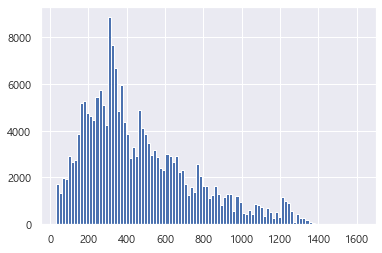

In [16]:
plt.hist(data['installment'], bins=100)
plt.show()

In [15]:
stat, p  = shapiro(data['installment'].dropna().values)
p

0.0

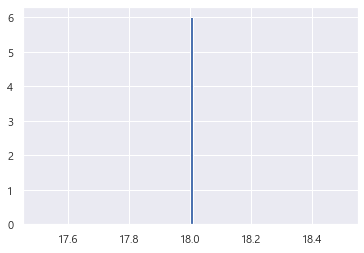

In [94]:
plt.hist(data['settlement_term'], bins=100)
plt.show()

In [96]:
stat, p  = shapiro(data['funded_amnt'].dropna().values)
p

0.0

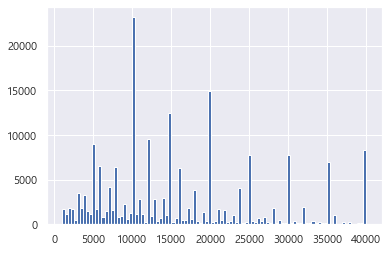

In [34]:
plt.hist(data['funded_amnt'], bins=100)
# plt.xlim([900, 1000])
plt.show()

In [67]:
data.columns[20:40]

Index(['dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries'],
      dtype='object')

In [74]:
data['total_pymnt'].value_counts()

0.00000        239
1215.49000     194
1257.30000     175
1246.16000     156
1234.95000     153
              ... 
1152.37000       1
2487.20000       1
3793.13000       1
20007.24822      1
1189.14000       1
Name: total_pymnt, Length: 81997, dtype: int64

In [75]:
data['total_pymnt'].dropna().count()

199999

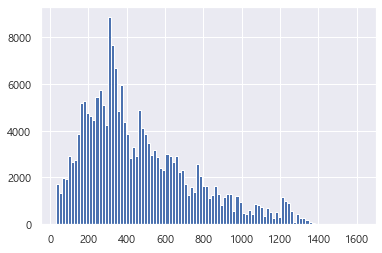

In [89]:
plt.hist(data['installment'], bins=100)
# plt.xlim([0, 25])
plt.show()

In [88]:
stat, p  = shapiro(data['installment'].dropna().values)
p

0.0

In [24]:
# nan 결측치 제거
data_hardship = data['hardship_amount'].dropna()

In [86]:
data['dti'].skew()

23.455840681048375

In [27]:
data_hardship.shape

(5,)

In [83]:
import statsmodels.stats.stattools
statsmodels.stats.stattools.jarque_bera(data['total_pymnt'])

(22012811.120470203, 0.0, 6.236496967160195, 52.859552389923664)

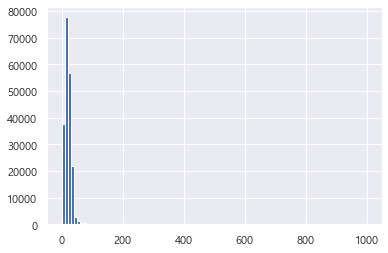

In [109]:
plt.hist(data['dti'].dropna(), bins=100)
# plt.xlim([0, 25])
plt.show()

In [105]:
data_dti

0         18.24
1         26.52
2         10.51
3         16.74
4         26.35
          ...  
199994    27.13
199995     6.63
199996    13.97
199997     6.64
199998    13.59
Name: dti, Length: 199999, dtype: float64

In [107]:
print(min(data_dti), max(data_dti))

0.0 999.0


In [111]:
len(data_dti.value_counts())

7383

x축 - 도수분포표 범위
y축 - 각 범위의 도수
min & max

In [113]:
len(data[].value_counts())

Series([], dtype: int64)